In [1]:
import matplotlib.patches as mpatches
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import mat73
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn import preprocessing
from scipy.io import loadmat
import math
from collections import defaultdict
import seaborn as sns
import random
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 8})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
source_path = './source_data/ED_1/'

/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92803/3554523277.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[[], []]

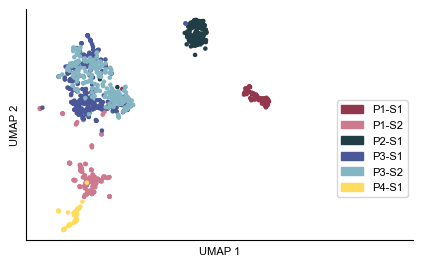

In [2]:
d = np.load(f'{source_path}/panela.npz')
embedding=d['embedding']
colors = d['colors']
#sns.set_theme()
#sns.set_style("whitegrid")
fig = plt.figure(figsize=(5,3))

# Access the current axes
ax = plt.gca()
pd.DataFrame({'x': embedding[:, 0],
              'y': embedding[:, 1], 
              'c': colors}).to_csv('./statistical_source/ED1/panela.csv')
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=colors,
    s=5)
plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the IED Classes', fontsize=30)

red_np34_b2 = mpatches.Patch(color='#92374D', label='P1-S1')
green_np34_b3 = mpatches.Patch(color='#CD7A8F', label='P1-S2')
blue_np35_b2 = mpatches.Patch(color='#213D45', label='P2-S1')
cyan_np66_b1 = mpatches.Patch(color='#4A5899', label='P3-S1')
magenta_np66_b2 = mpatches.Patch(color='#83B5C3', label='P3-S2')
yellow_np86_b1 = mpatches.Patch(color='#FFDC5E', label='P4-S1')

plt.legend(bbox_to_anchor=(1, 0.63), 
           handles=[red_np34_b2, green_np34_b3, blue_np35_b2, cyan_np66_b1, magenta_np66_b2, yellow_np86_b1])
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.xlim([-10, 30])
# plt.ylim([-15,25])
ax.set(xticks=[],yticks=[])

#fig.savefig('./UMAP_IEDs.png',dpi=300,bbox_inches='tight')  

# (figsize=(5, 10))



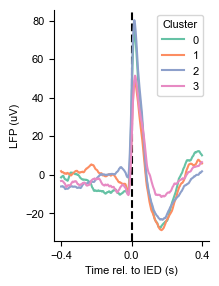

In [3]:
centroids = np.load(f'{source_path}/panelb.npy')
import seaborn as sns
fig,ax = plt.subplots(figsize=(2,3))
pal = sns.color_palette('Set2')
t_ar = np.linspace(-0.4,0.4,centroids.shape[-1])
for i,c,cent in zip(range(len(centroids)),pal,centroids):
    plt.plot(t_ar,cent,color=c,label=i)
ax.set(xlabel='Time rel. to IED (s)',ylabel='LFP (uV)',xticks=[-0.4,0,0.4])
ax.axvline(0,linestyle='--',color='k',zorder=-500)
ax.legend(title='Cluster')
#fig.savefig('./np35_kmean.png',dpi=300,bbox_inches='tight')  


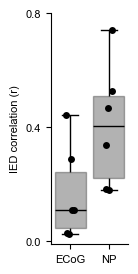

In [4]:
import seaborn as sns

plt_d = pd.read_csv(f'{source_path}/panelc.csv')

fig,ax = plt.subplots(figsize=(1,3))
sns.boxplot(data=plt_d,x='id_type',y='Correlation (r)',color='k',boxprops=dict(alpha=0.3))
sns.stripplot(data=plt_d,x='id_type',y='Correlation (r)',color='k')
ax.set(xlabel='',yticks=[0,0.4,0.8],ylabel='IED correlation (r)')
#fig.savefig('./ecog_vs_np.png',dpi=300,bbox_inches='tight')  
plt_d.to_csv('./statistical_source/ED1/panelc.csv')

In [5]:
plt_d

,Unnamed: 0,Correlation (r),id_type
0,0,0.444042,ECoG
1,1,0.288682,ECoG
2,2,0.108991,ECoG
3,3,0.027624,ECoG
4,4,0.109316,ECoG
5,5,0.024990,ECoG
6,6,0.525857,NP
7,7,0.338497,NP
8,8,0.178888,NP
9,9,0.184290,NP


In [6]:
from scipy.stats import mannwhitneyu
mannwhitneyu(plt_d[plt_d.id_type == 'ECoG']['Correlation (r)'].values,
             plt_d[plt_d.id_type == 'NP']['Correlation (r)'].values)

MannwhitneyuResult(statistic=5.0, pvalue=0.04112554112554113)

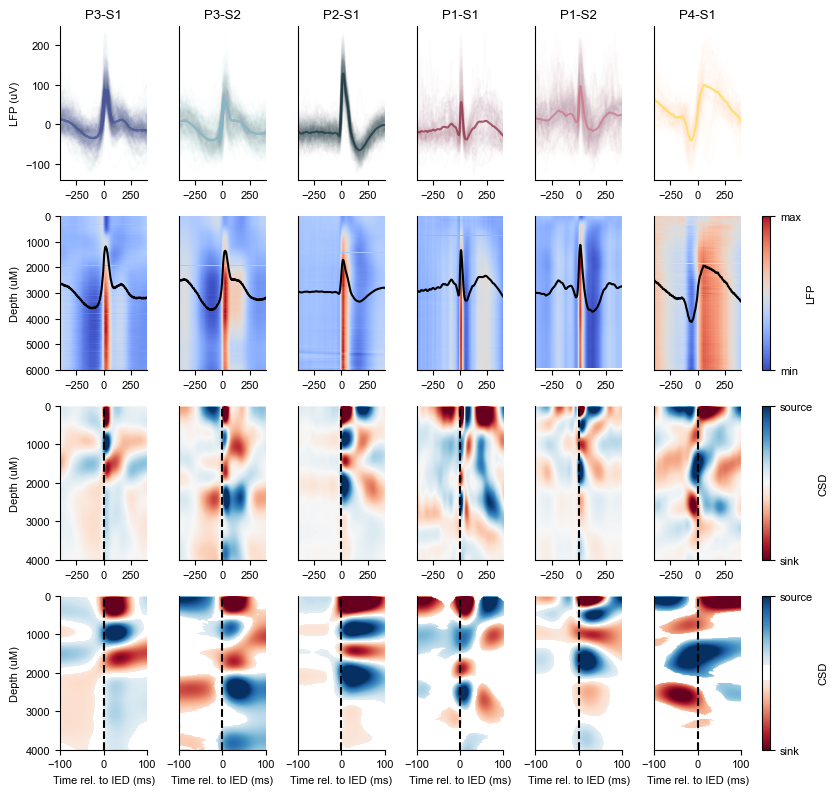

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

npz_path = f"{source_path}/ied_lfp_csd_minimal_bundle.npz"
depth_cut = 4000

D = np.load(npz_path, allow_pickle=True)

SB_LIST = list(D['SB_LIST'])

# -----------------------------
# Rebuild dicts
# -----------------------------
ied_erps = {}
ied_data = {}
csd_data = {}
null_dists = {}

surf_depth = {}
input_depth = {}
srate = {}
blk_mapper = {}

lfp_nch = {}

# 
paired_down_csd = {}
paired_down_csd_filt = {}

for sb in SB_LIST:
    ied_erps[sb]   = D[f'ied_erps__{sb}']
    ied_data[sb]   = D[f'ied_data__{sb}']
    csd_data[sb]   = D[f'csd_data__{sb}']
    null_dists[sb] = D[f'null_dists__{sb}']

    surf_depth[sb]  = float(D[f'surf_depth__{sb}'])
    input_depth[sb] = np.asarray(D[f'input_depth__{sb}']).astype(float)
    srate[sb]       = float(D[f'srate__{sb}'])

    blk_mapper[sb]  = str(D[f'blk_mapper__{sb}'])

    lfp_nch[sb] = int(D[f'lfp_nch__{sb}'])

ycoords   = np.asarray(D['ycoords']).astype(float)
chan_idx  = np.asarray(D['chan_idx']).astype(int)

ied_win   = np.asarray(D['ied_win']).astype(float)
n_sp      = int(np.asarray(D['n_sp']))

bin_width = int(np.asarray(D['bin_width']))
ch_sp     = float(np.asarray(D['ch_sp']))
n_ch      = int(np.asarray(D['n_ch']))

# -----------------------------
# Remake plot (same structure)
# -----------------------------
cols = ['#4A5899','#83B5C3','#213D45','#92374D','#CD7A8F','#FFDC5E']

fig, axes = plt.subplots(4, len(SB_LIST), figsize=(8, 8))

# -----------------------------
# Row 1: single trial traces
# -----------------------------
for c, ax, sb in zip(cols, axes[0], SB_LIST):
    lfp_ied_cur = ied_erps[sb]
    t_ar = np.linspace(-500, 500, lfp_ied_cur.shape[-1])

    ax.plot(t_ar, lfp_ied_cur.T, color=c, alpha=0.01)
    ax.plot(t_ar, lfp_ied_cur.mean(0), color=c, alpha=0.8)

    ax.set(xlim=[-400, 400])

    if sb == 'NP66_B1':
        ax.set(ylabel='LFP (uV)')
    else:
        ax.set(yticks=[])

    ax.set(title=blk_mapper[sb])

# -----------------------------
# Row 2: LFP depth x time
# -----------------------------
for ax, sb in zip(axes[1], SB_LIST):

    # EXACTLY matches your original logic
    n_bin = lfp_nch[sb] // bin_width

    depth_cur = surf_depth[sb] - ycoords[chan_idx].astype(float)

    # color plot LFP IEDs averaged across trials
    ied_mean = ied_data[sb]#np.mean(ied_data[sb], axis=2)

    times = (np.arange(n_sp) * (1 / srate[sb]) + ied_win[0]) * 1000

    im_lfp = ax.pcolormesh(
        np.linspace(times[0], times[-1], ied_mean.shape[-1]),
        depth_cur[depth_cur > 0],
        ied_mean[depth_cur > 0, :],
        cmap='coolwarm',
        vmin=ied_mean.min(),
        vmax=ied_mean.max(),
    )

    ax.invert_yaxis()
    depth_cur = depth_cur[depth_cur > 0]

    # line plot IEDs averaged across channels & trials
    ied_mean_trace = np.mean(ied_data[sb], axis=0)#axis=(0, 2))
    ax.plot(times, -20 * ied_mean_trace + 2900, 'k-', linewidth=1.5)

    # (computed in your original code)
    surf_ch = (n_ch - 1) - (surf_depth[sb] / ch_sp)
    input_upper_ch = surf_ch + (input_depth[sb][0] / ch_sp)
    input_lower_ch = surf_ch + (input_depth[sb][1] / ch_sp)

    # convert y-axis labels to cortical depth in µm (distance-to-surface)
    y_ticks = ax.get_yticks()[:-1]
    y_depths = [(t - surf_ch) * ch_sp for t in y_ticks]
    y_labels = [str(int(d)) for d in y_depths]

    ax.set(xlim=[-400, 400], ylim=[6000, 0])

    if sb == 'NP66_B1':
        ax.set(ylabel='Depth (uM)')
    else:
        ax.set(yticks=[])

    ax.margins(y=0)

# -----------------------------
# Row 3: raw CSD (no threshold)
# -----------------------------
for ax, sb in zip(axes[2], SB_LIST):
    null = null_dists[sb]
    #null = np.percentile(null, 97.5, axis=0)

    to_plot = csd_data[sb].copy()

    ov_max = np.amax(np.abs(to_plot))
    ov_max = np.min([np.amax(to_plot), np.amax(-1 * to_plot)])

    zero_frac = 0.01
    vmax = ov_max / 1.5
    vmin = -vmax

    # Create a custom colormap with a larger white center
    cmap = plt.get_cmap('RdBu')
    colors = cmap(np.linspace(0, 1, 256))
    n_white = int(len(colors) * zero_frac / 2)
    mid = len(colors) // 2
    colors[mid - n_white: mid + n_white] = [1, 1, 1, 1]
    cmap_mod = mcolors.ListedColormap(colors)

    # EXACTLY matches your original logic
    n_bin = lfp_nch[sb] // bin_width

    depth_cur = surf_depth[sb] - ycoords[chan_idx].astype(float)
    depth_cur = depth_cur[depth_cur > 0]

    depth_cur_csd = depth_cur.copy()
    depth_cur_csd = depth_cur_csd[0:n_bin * bin_width]
    binned_depths = depth_cur_csd.reshape(n_bin, -1).mean(axis=1)
    paired_down_csd[sb] = (to_plot,vmin,vmax,binned_depths[-1])
    im_csd = ax.imshow(
        to_plot,
        aspect='auto',
        origin='upper',
        cmap='RdBu',  # NOTE: your original ended up using RdBu not cmap_mod here
        vmin=vmin,
        vmax=vmax,
        extent=[times[0], times[-1], binned_depths[-1], 0],
    )

    ax.set(xlim=[-400, 400], ylim=[depth_cut, 0])

    if sb == 'NP66_B1':
        ax.set(ylabel='Depth (uM)')
    else:
        ax.set(yticks=[])

    ax.axvline(0, color='k', linestyle='--', zorder=5000)
    ax.margins(y=0)

# -----------------------------
# Row 4: thresholded CSD
# -----------------------------
for ax, sb in zip(axes[3], SB_LIST):
    null = null_dists[sb]
    #null = np.percentile(null, 99.5, axis=0)

    to_plot = csd_data[sb].copy()
    to_plot[np.abs(to_plot) < null[(null.shape[0] - to_plot.shape[0]):]] = 0

    ov_max = np.amax(np.abs(to_plot))
    ov_max = np.min([np.amax(to_plot), np.amax(-1 * to_plot)])

    zero_frac = 0.1
    vmax = ov_max / 1.5
    vmin = -vmax

    cmap = plt.get_cmap('RdBu')
    colors = cmap(np.linspace(0, 1, 256))
    n_white = int(len(colors) * zero_frac / 2)
    mid = len(colors) // 2
    colors[mid - n_white: mid + n_white] = [1, 1, 1, 1]
    cmap_mod = mcolors.ListedColormap(colors)

    # EXACTLY matches your original logic
    n_bin = lfp_nch[sb] // bin_width

    depth_cur = surf_depth[sb] - ycoords[chan_idx].astype(float)
    depth_cur = depth_cur[depth_cur > 0]

    depth_cur_csd = depth_cur.copy()
    depth_cur_csd = depth_cur_csd[0:n_bin * bin_width]
    binned_depths = depth_cur_csd.reshape(n_bin, -1).mean(axis=1)
    paired_down_csd_filt[sb] = (to_plot,vmin,vmax,binned_depths[-1],cmap_mod)

    im_csd_2 = ax.imshow(
        to_plot,
        aspect='auto',
        origin='upper',
        cmap=cmap_mod,
        vmin=vmin,
        vmax=vmax,
        extent=[times[0], times[-1], binned_depths[-1], 0],
    )

    ax.set_xlabel('Time rel. to IED (ms)')
    ax.set(xlim=[-100, 100], ylim=[depth_cut, 0])

    if sb == 'NP66_B1':
        ax.set(ylabel='Depth (uM)')
    else:
        ax.set(yticks=[])

    ax.axvline(0, color='k', linestyle='--', zorder=5000)
    ax.margins(y=0)

plt.tight_layout()

# -----------------------------
# Colorbars (match your code)
# -----------------------------
cbar_lfp = fig.colorbar(im_lfp, ax=axes[0, :], orientation='vertical', fraction=0.02, pad=0.03)
cbar_lfp.set_ticks([im_lfp.norm.vmin, im_lfp.norm.vmax])
cbar_lfp.set_ticklabels(['min', 'max'])
cbar_lfp.set_label('LFP')
cbar_lfp.ax.set_visible(False)

cbar_lfp = fig.colorbar(im_lfp, ax=axes[1, :], orientation='vertical', fraction=0.02, pad=0.03)
cbar_lfp.set_ticks([im_lfp.norm.vmin, im_lfp.norm.vmax])
cbar_lfp.set_ticklabels(['min', 'max'])
cbar_lfp.set_label('LFP')

cbar_csd = fig.colorbar(im_csd, ax=axes[2, :], orientation='vertical', fraction=0.02, pad=0.03)
cbar_csd.set_ticks([im_csd.norm.vmin, im_csd.norm.vmax])
cbar_csd.set_ticklabels(['sink', 'source'])
cbar_csd.set_label('CSD')

cbar_csd = fig.colorbar(im_csd_2, ax=axes[3, :], orientation='vertical', fraction=0.02, pad=0.03)
cbar_csd.set_ticks([im_csd.norm.vmin, im_csd_2.norm.vmax])
cbar_csd.set_ticklabels(['sink', 'source'])
cbar_csd.set_label('CSD')

#plt.savefig("./csd_plots_recreated.jpg", dpi=300, bbox_inches='tight')
plt.show()
